<a href="https://colab.research.google.com/github/avadhutc/Session4/blob/master/code/EVA_Session_4_Third_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Change No: 1,  Increase batch size from 32 to 64
## Lets try increasing batch sizes helping or not

# **Import Libraries and modules**

In [0]:
# https://keras.io/
!pip install -q keras # install keras package
import keras # import keras package for use

Using TensorFlow backend.


In [0]:
import numpy as np # import numpy package alias np

from keras.models import Sequential # import Sequential flow to build model
from keras.layers import Flatten # import flatten layer to convert any dimensional layer into one di
from keras.layers import Convolution2D, MaxPooling2D # for doing convolution and maxpooling on image 
from keras.utils import np_utils # utility functions

from keras.datasets import mnist# import mnist dataset
from matplotlib import pyplot as plt # import pyplot alias plt for plotting
#%matplotlib inline # print results in notebook cells

### Load pre-shuffled MNIST data into train and test sets

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()# download mnist dataset and load for training and testing sets

(60000, 28, 28)


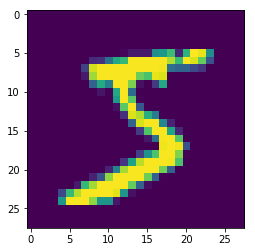

In [0]:
print (X_train.shape) # print shape of X_train dataset
 


plt.imshow(X_train[0]) # display image

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1) # reshape or arrange train dataset for all images with 1 channel 
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)# reshape or arrange test dataset for all images with 1 channel

In [0]:
X_train = X_train.astype('float32') # set datatype of training dataset as float32
X_test = X_test.astype('float32')# set datatype of test dataset as float32
X_train /= 255 # normalize training dataset between 0 and 1
X_test /= 255 # normalize tes dataset between 0 and 1

In [0]:
y_train[:10] # training set labels

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)# convert train labels into one-hot encodings
Y_test = np_utils.to_categorical(y_test, 10)# convert test labels into one-hot encodings

In [0]:
Y_train[:10]# print first 10 train labels


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [0]:
from keras.layers import Activation, BatchNormalization

model = Sequential() # Sequential model
 
model.add(Convolution2D(16, 3, 3, activation='relu', input_shape=(28,28,1))) # Input Channel dimension= 1, output channel dimension= 16, RF = 3, out_img_size = 26

model.add(Convolution2D(32, 3, 3, activation='relu')) # Input Channel dimension= 16, output channel dimension= 32, RF = 5, out_img_size = 24

model.add(MaxPooling2D(pool_size = (2, 2))) # Input Channel dimension= 32, output channel dimension= 32, RF = 6, out_img_size = 12
model.add(Convolution2D(10, 1, activation='relu')) # Input Channel dimension= 32, output channel dimension= 10, RF = 6, out_img_size = 12

model.add(Convolution2D(64, 3, 3, activation='relu'))# Input Channel dimension= 10, output channel dimension= 64, RF = 10, out_img_size = 10

model.add(MaxPooling2D(pool_size = (2, 2)))# Input Channel dimension= 64, output channel dimension= 64, RF = 11, out_img_size = 5
model.add(Convolution2D(10, 1, activation='relu'))# Input Channel dimension= 64, output channel dimension= 10, RF = 11, out_img_size = 5
 
model.add(Convolution2D(10, 5)) # Input Channel dimension= 10, output channel dimension= 10, RF = 27, out_img_size = 1

model.add(Flatten()) #flatten image dimension into 1
model.add(Activation('softmax'))# softmax to assign confidence score of each class

Instructions for updating:
Colocations handled automatically by placer.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`
  # This is added back by InteractiveShellApp.init_path()


In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 16)        160       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 12, 12, 10)        330       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 10, 10, 64)        5824      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 5, 5, 10)          650       
__________

In [0]:
# import callbacks
from keras.callbacks import ModelCheckpoint

In [0]:
# save best weights 
final_weights_path = 'best_mnist_cnn_model.h5'

In [0]:
callbacks_list = [ModelCheckpoint(final_weights_path, monitor='val_acc', verbose = 1,save_best_only = True)]  


In [0]:
# model compilation
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [0]:
# model training
history = model.fit(X_train, Y_train, batch_size=64, nb_epoch=30, validation_data=(X_test,Y_test),callbacks = callbacks_list, verbose=1)

Instructions for updating:
Use tf.cast instead.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 7s 119us/step - loss: 0.2730 - acc: 0.9146 - val_loss: 0.0816 - val_acc: 0.9759

Epoch 00001: val_acc improved from -inf to 0.97590, saving model to best_mnist_cnn_model.h5
Epoch 2/30
60000/60000 [==============================] - 5s 79us/step - loss: 0.0761 - acc: 0.9761 - val_loss: 0.0583 - val_acc: 0.9812

Epoch 00002: val_acc improved from 0.97590 to 0.98120, saving model to best_mnist_cnn_model.h5
Epoch 3/30
60000/60000 [==============================] - 5s 80us/step - loss: 0.0581 - acc: 0.9819 - val_loss: 0.0471 - val_acc: 0.9847

Epoch 00003: val_acc improved from 0.98120 to 0.98470, saving model to best_mnist_cnn_model.h5
Epoch 4/30
60000/60000 [==============================] - 5s 80us/step - loss: 0.0483 - acc: 0.9848 - val_loss: 0.0373 - val_acc: 0.9869

Epoch 00004: val_acc improved from 0.98470 to 0.98690, saving model to best_mnist_cnn_model.h5
Epoch 5/30
60000/600

# Visualization

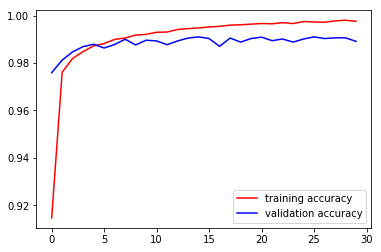

In [0]:
plt.plot(history.history['acc'],'r')
plt.plot(history.history['val_acc'],'b')
plt.legend({'training accuracy':'r', 'validation accuracy': 'b'})
plt.show()

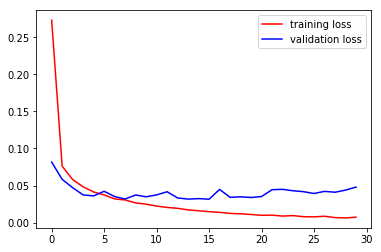

In [0]:
plt.plot(history.history['loss'],'r')
plt.plot(history.history['val_loss'],'b')
plt.legend({'training loss':'r', 'validation loss': 'b'})
plt.show()

In [0]:
#model score accuarcy on test data
score = model.evaluate(X_test, Y_test, verbose=0)

In [0]:
print(score)

[0.04790766974819267, 0.9891]


# Maximum Validation Accuracy achieved 99.10% @ 15th epoch with 14.5 K parameters
# Batch size 64 size is not helping here

# Change No: 2,  Increase batch size from 64 to 128

In [0]:
from keras.layers import Activation, BatchNormalization

model = Sequential() # Sequential model
 
model.add(Convolution2D(16, 3, 3, activation='relu', input_shape=(28,28,1))) # Input Channel dimension= 1, output channel dimension= 16, RF = 3, out_img_size = 26

model.add(Convolution2D(32, 3, 3, activation='relu')) # Input Channel dimension= 16, output channel dimension= 32, RF = 5, out_img_size = 24

model.add(MaxPooling2D(pool_size = (2, 2))) # Input Channel dimension= 32, output channel dimension= 32, RF = 6, out_img_size = 12
model.add(Convolution2D(10, 1, activation='relu')) # Input Channel dimension= 32, output channel dimension= 10, RF = 6, out_img_size = 12

model.add(Convolution2D(64, 3, 3, activation='relu'))# Input Channel dimension= 10, output channel dimension= 64, RF = 10, out_img_size = 10

model.add(MaxPooling2D(pool_size = (2, 2)))# Input Channel dimension= 64, output channel dimension= 64, RF = 11, out_img_size = 5
model.add(Convolution2D(10, 1, activation='relu'))# Input Channel dimension= 64, output channel dimension= 10, RF = 11, out_img_size = 5
 
model.add(Convolution2D(10, 5)) # Input Channel dimension= 10, output channel dimension= 10, RF = 27, out_img_size = 5

model.add(Flatten()) #flatten image dimension into 1
model.add(Activation('softmax'))# softmax to assign confidence score of each class

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`
  # This is added back by InteractiveShellApp.init_path()


In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 26, 26, 16)        160       
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 24, 24, 32)        4640      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 12, 12, 10)        330       
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 10, 10, 64)        5824      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 5, 5, 10)          650       
__________

In [0]:
# import callbacks
from keras.callbacks import ModelCheckpoint

In [0]:
# save best weights 
final_weights_path = 'best_mnist_cnn_model.h5'

In [0]:
callbacks_list = [ModelCheckpoint(final_weights_path, monitor='val_acc', verbose = 1,save_best_only = True)]  


In [0]:
# model compilation
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [0]:
# model training
history = model.fit(X_train, Y_train, batch_size=128, nb_epoch=30, validation_data=(X_test,Y_test),callbacks = callbacks_list, verbose=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 4s 66us/step - loss: 0.3346 - acc: 0.8937 - val_loss: 0.0969 - val_acc: 0.9694

Epoch 00001: val_acc improved from -inf to 0.96940, saving model to best_mnist_cnn_model.h5
Epoch 2/30
60000/60000 [==============================] - 3s 56us/step - loss: 0.0831 - acc: 0.9747 - val_loss: 0.0584 - val_acc: 0.9814

Epoch 00002: val_acc improved from 0.96940 to 0.98140, saving model to best_mnist_cnn_model.h5
Epoch 3/30
60000/60000 [==============================] - 3s 51us/step - loss: 0.0635 - acc: 0.9804 - val_loss: 0.0549 - val_acc: 0.9836

Epoch 00003: val_acc improved from 0.98140 to 0.98360, saving model to best_mnist_cnn_model.h5
Epoch 4/30
60000/60000 [==============================] - 3s 48us/step - loss: 0.0528 - acc: 0.9841 - val_loss: 0.0606 - val_acc: 0.9796

Epoch 00004: val_acc did not improve from 0.98360
Epoch 5/30
60000/60000 [==============================] - 3s 48us/

# Visualization

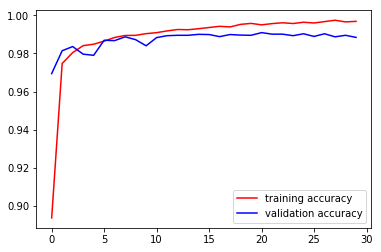

In [0]:
plt.plot(history.history['acc'],'r')
plt.plot(history.history['val_acc'],'b')
plt.legend({'training accuracy':'r', 'validation accuracy': 'b'})
plt.show()

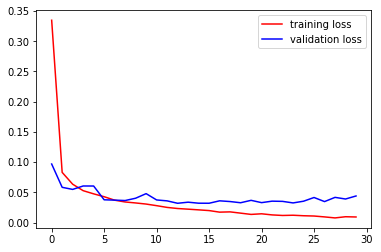

In [0]:
plt.plot(history.history['loss'],'r')
plt.plot(history.history['val_loss'],'b')
plt.legend({'training loss':'r', 'validation loss': 'b'})
plt.show()

In [0]:
#model score accuarcy on test data
score = model.evaluate(X_test, Y_test, verbose=0)

In [0]:
print(score)

[0.04407113555301885, 0.9884]


# Maximum Validation Accuracy achieved 99.09% @ 21st epoch with 14.5 K parameters
# Batch size 128 size is not helping here

# Change No: 3,  Original batch size = 32 and include Batch Normalization after kernel(3,3), Increased No of epochs  to 50

In [0]:
from keras.layers import Activation, BatchNormalization

model = Sequential() # Sequential model
 
model.add(Convolution2D(16, 3, 3, activation='relu', input_shape=(28,28,1))) # Input Channel dimension= 1, output channel dimension= 16, RF = 3, out_img_size = 26
model.add(BatchNormalization())

model.add(Convolution2D(32, 3, 3, activation='relu')) # Input Channel dimension= 16, output channel dimension= 32, RF = 5, out_img_size = 24
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size = (2, 2))) # Input Channel dimension= 32, output channel dimension= 32, RF = 6, out_img_size = 12
model.add(Convolution2D(10, 1, activation='relu')) # Input Channel dimension= 32, output channel dimension= 10, RF = 6, out_img_size = 12

model.add(Convolution2D(64, 3, 3, activation='relu'))# Input Channel dimension= 10, output channel dimension= 64, RF = 10, out_img_size = 10
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size = (2, 2)))# Input Channel dimension= 64, output channel dimension= 64, RF = 11, out_img_size = 5
model.add(Convolution2D(10, 1, activation='relu'))# Input Channel dimension= 64, output channel dimension= 10, RF = 11, out_img_size = 5
 
model.add(Convolution2D(10, 5)) # Input Channel dimension= 10, output channel dimension= 10, RF = 27, out_img_size = 1

model.add(Flatten()) #flatten image dimension into 1
model.add(Activation('softmax'))# softmax to assign confidence score of each class

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`
  


In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_37 (Conv2D)           (None, 26, 26, 16)        160       
_________________________________________________________________
batch_normalization_13 (Batc (None, 26, 26, 16)        64        
_________________________________________________________________
conv2d_38 (Conv2D)           (None, 24, 24, 32)        4640      
_________________________________________________________________
batch_normalization_14 (Batc (None, 24, 24, 32)        128       
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_39 (Conv2D)           (None, 12, 12, 10)        330       
_________________________________________________________________
conv2d_40 (Conv2D)           (None, 10, 10, 64)        5824      
__________

In [0]:
# import callbacks
from keras.callbacks import ModelCheckpoint

In [0]:
# save best weights 
final_weights_path = 'best_mnist_cnn_model.h5'

In [0]:
callbacks_list = [ModelCheckpoint(final_weights_path, monitor='val_acc', verbose = 1,save_best_only = True)]  


In [0]:
# model compilation
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

# Visualization

In [0]:
# model training
history = model.fit(X_train, Y_train, batch_size=32, nb_epoch=50, validation_data=(X_test,Y_test),callbacks = callbacks_list, verbose=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 15s 243us/step - loss: 0.3797 - acc: 0.9373 - val_loss: 0.1414 - val_acc: 0.9823

Epoch 00001: val_acc did not improve from 0.99280
Epoch 2/50
60000/60000 [==============================] - 13s 220us/step - loss: 0.1541 - acc: 0.9695 - val_loss: 0.0843 - val_acc: 0.9850

Epoch 00002: val_acc did not improve from 0.99280
Epoch 3/50
60000/60000 [==============================] - 13s 221us/step - loss: 0.1060 - acc: 0.9766 - val_loss: 0.0542 - val_acc: 0.9880

Epoch 00003: val_acc did not improve from 0.99280
Epoch 4/50
60000/60000 [==============================] - 14s 228us/step - loss: 0.0827 - acc: 0.9809 - val_loss: 0.0426 - val_acc: 0.9899

Epoch 00004: val_acc did not improve from 0.99280
Epoch 5/50
60000/60000 [==============================] - 14s 238us/step - loss: 0.0692 - acc: 0.9836 - val_loss: 0.0389 - val_acc: 0.9907

Epoch 00005: val_acc did not improve from 0.99280


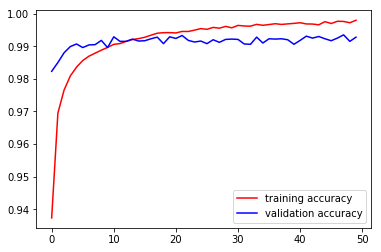

In [0]:
plt.plot(history.history['acc'],'r')
plt.plot(history.history['val_acc'],'b')
plt.legend({'training accuracy':'r', 'validation accuracy': 'b'})
plt.show()

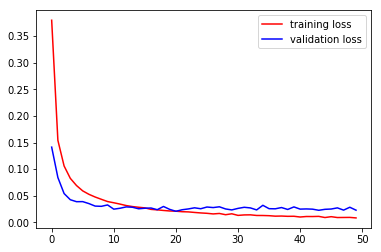

In [0]:
plt.plot(history.history['loss'],'r')
plt.plot(history.history['val_loss'],'b')
plt.legend({'training loss':'r', 'validation loss': 'b'})
plt.show()

In [0]:
#model score accuarcy on test data
score = model.evaluate(X_test, Y_test, verbose=0)

In [0]:
print(score)

[0.022910703869312418, 0.9928]


# Maximum Validation Accuracy achieved 99.35% @ 48th epoch with 14.5 K parameters
# Batch size 32 size along with batch normalization and more epochs counts helped
# Let's forward this network in 4th notebook